In [1]:
import strongholds
import strongholds.graphing as mplt

import numpy as np

from matplotlib import pyplot

fixed_rng = np.random.default_rng(0)

While standard triangulation techniques require throwing two Eyes of Ender to find a stronghold, the speedrunning mod [Ninjabrain Bot](https://github.com/Ninjabrain1/Ninjabrain-Bot) can find strongholds in as few as one throw. In these notebooks, we use interactive graphs and Monte Carlo methods to show how this mod works and supplement its existing [derivation](https://github.com/Ninjabrain1/Ninjabrain-Bot/blob/main/triangulation.pdf).

To use these interactive graphs, you will need to clone this repository and run this notebook for yourself.

### Introduction
In Java Edition, [strongholds](https://minecraft.wiki/w/Stronghold#Java_Edition) are generated in eight rings of set thickness and distance from the world origin.

As part of the generation process, strongholds are "snapped" to the center of a chunk (the 8, 8 coordinates) - as such, there are only a finite (but large) number of grid points that a stronghold can be placed.

Locations within the first ring rings are shown below; zooming in on the graph makes the discrete grid structure more apparent.

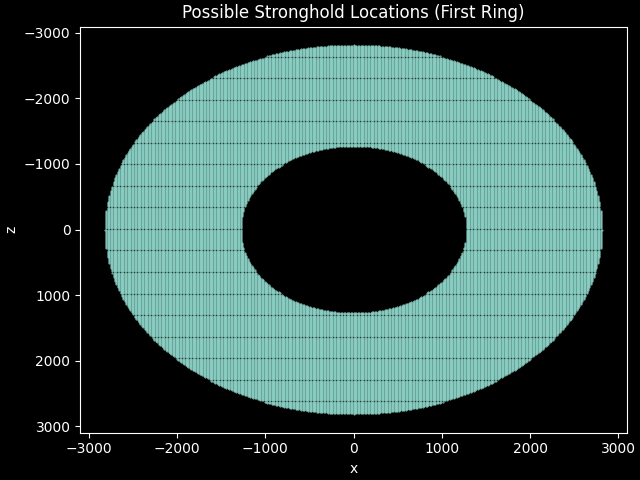

In [2]:
%matplotlib widget

fig1, ax1 = mplt.xz_subplots()
ax1.set_title("Possible Stronghold Locations (First Ring)")

grid = strongholds.generation_grid(ring_nums=range(1))
ax1.scatter(grid.x, grid.z, s=0.2)

mplt.flip_zaxis(ax1)

As described on the wiki, each ring has a set amount of strongholds in them, for a total of 128 rings in total. In most cases, players will find themselves visiting the first point.

In [3]:
player = strongholds.Coordinates.from_rect(3000, -300)

all_strongholds = strongholds.generate_all(rng=fixed_rng)

target = strongholds.closest_stronghold(player, all_strongholds)
print("Closest stronghold to (3000, -300):", target.to_xz())

Closest stronghold to (3000, -300): [2272.  344.]


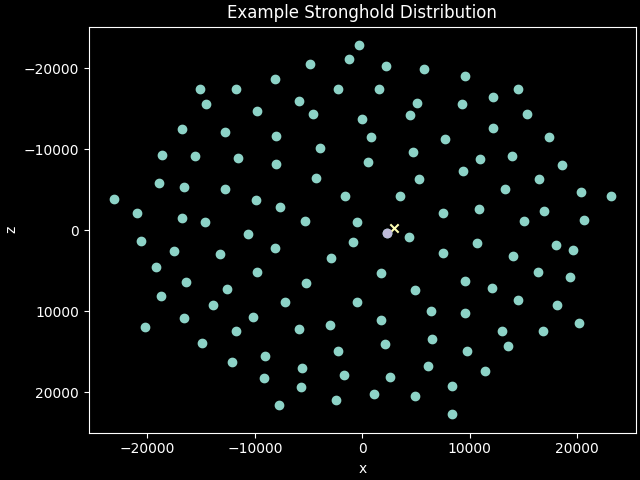

In [4]:
fig2, ax2 = mplt.xz_subplots()
ax2.set_title("Example Stronghold Distribution")

ax2.scatter(all_strongholds.x, all_strongholds.z)
ax2.scatter(player.x, player.z, marker="x")
ax2.scatter(target.x, target.z)

mplt.flip_zaxis(ax2)

Our task is to find a way to reliably predict what the nearest stronghold to the player is, given their position and the direction of their Eye of Ender throw.